<a href="https://colab.research.google.com/github/gustavoramos82/visualiza-o-prouni-2017/blob/main/Eda_prouni_analise_micro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise micro

Neste notebook, será escolhido o Estado do Pará, e com os resultados, fazer comparações com a análise macro.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
prouni = pd.read_csv('/content/drive/MyDrive/Datasets/pda-prouni-2017.csv',sep=';')
prouni.drop(['CODIGO_EMEC_IES_BOLSA','CPF_BENEFICIARIO_BOLSA'],axis=1,
            inplace=True)
prouni['DT_NASCIMENTO_BENEFICIARIO'] = pd.to_datetime(prouni['DT_NASCIMENTO_BENEFICIARIO'],
                                                      format='%d/%m/%Y')
prouni['IDADE'] = 2017 - prouni['DT_NASCIMENTO_BENEFICIARIO'].dt.year
prouni.head()

,ANO_CONCESSAO_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,IDADE
0,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,F,Branca,1992-04-29,N,Sul,PR,SAO JOSE DOS PINHAIS,25
1,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1999-01-24,N,Sul,PR,TOLEDO,18
2,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1994-05-19,N,Sul,PR,CURITIBA,23
3,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1997-01-31,N,Sul,PR,TOLEDO,20
4,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1994-11-24,N,Sul,PR,CURITIBA,23


In [ ]:
# Selecionano o Estado do Pará
prouni_pa = prouni[prouni['SIGLA_UF_BENEFICIARIO_BOLSA']=='PA']
prouni_pa.head()

,ANO_CONCESSAO_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,IDADE
545,2017,UNIVERSIDADE CATÓLICA DE PELOTAS,BOLSA PARCIAL 50%,Presencial,Design De Moda,Noturno,F,Branca,1983-11-06,N,Norte,PA,BELEM,34
2924,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA INTEGRAL,Presencial,Direito,Matutino,M,Parda,1991-09-12,N,Norte,PA,BELEM,26
5628,2017,UNIVERSIDADE DA REGIÃO DE JOINVILLE,BOLSA INTEGRAL,Presencial,Arquitetura E Urbanismo,Noturno,M,Parda,1999-10-22,N,Norte,PA,NOVO PROGRESSO,18
6094,2017,UNIVERSIDADE DO VALE DO ITAJAÍ,BOLSA INTEGRAL,Presencial,Gestão De Recursos Humanos,Noturno,F,Parda,1999-08-06,N,Norte,PA,BENEVIDES,18
7088,2017,CENTRO UNIVERSITÁRIO BARÃO DE MAUÁ,BOLSA INTEGRAL,Presencial,Medicina,Integral,F,Branca,2000-06-26,N,Norte,PA,CASTANHAL,17


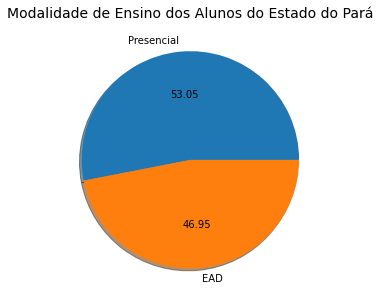

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Modalidade de Ensino dos Alunos do Estado do Pará',fontsize=14)
plt.pie(prouni_pa['MODALIDADE_ENSINO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_pa['MODALIDADE_ENSINO_BOLSA'].value_counts().index);

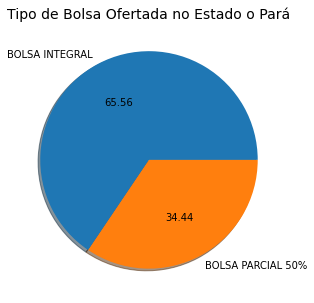

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Tipo de Bolsa Ofertada no Estado o Pará',fontsize=14)
plt.pie(prouni_pa['TIPO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_pa['TIPO_BOLSA'].value_counts().index);

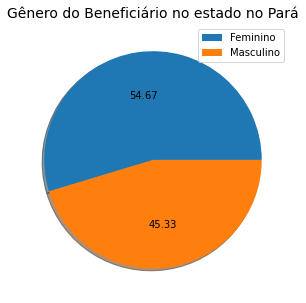

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Gênero do Beneficiário no estado no Pará',fontsize=14)
plt.pie(prouni_pa['SEXO_BENEFICIARIO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f')
plt.legend(['Feminino','Masculino']);

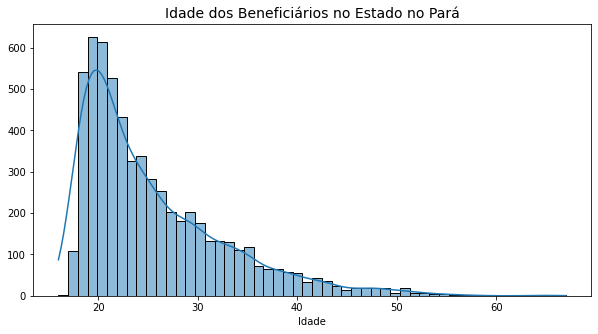

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Idade dos Beneficiários no Estado no Pará',fontsize=14)
sns.histplot(x='IDADE',data=prouni_pa,kde=True)
plt.xlabel('Idade')
plt.ylabel('');

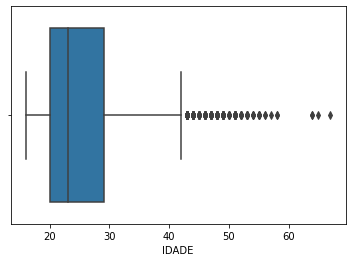

In [ ]:
sns.boxplot(x='IDADE',data=prouni_pa)

In [ ]:
prouni_pa['MUNICIPIO_BENEFICIARIO_BOLSA'].value_counts()

BELEM             1823
ANANINDEUA         558
MARABA             397
SANTAREM           321
PARAUAPEBAS        218
                  ... 
PEIXE-BOI            1
SAPUCAIA             1
NOVO PROGRESSO       1
FARO                 1
BANNACH              1
Name: MUNICIPIO_BENEFICIARIO_BOLSA, Length: 138, dtype: int64

<BarContainer object of 30 artists>

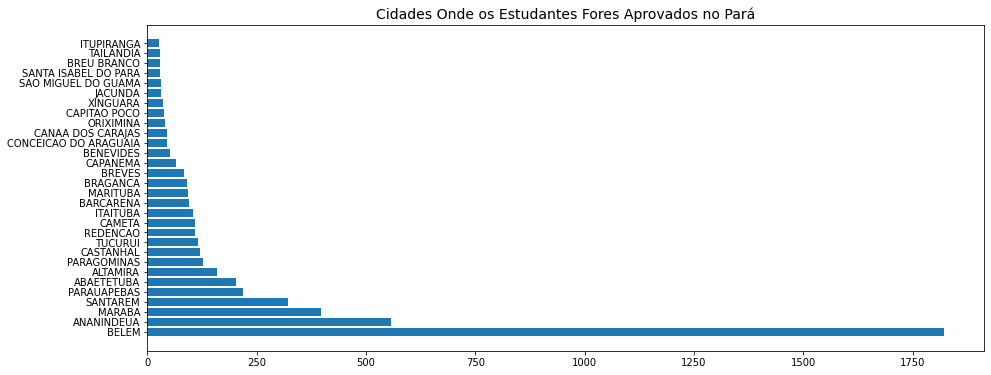

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Cidades Onde os Estudantes Fores Aprovados no Pará',fontsize=14)
plt.barh(prouni_pa['MUNICIPIO_BENEFICIARIO_BOLSA'].value_counts().index[0:30],
         prouni_pa['MUNICIPIO_BENEFICIARIO_BOLSA'].value_counts()[0:30])

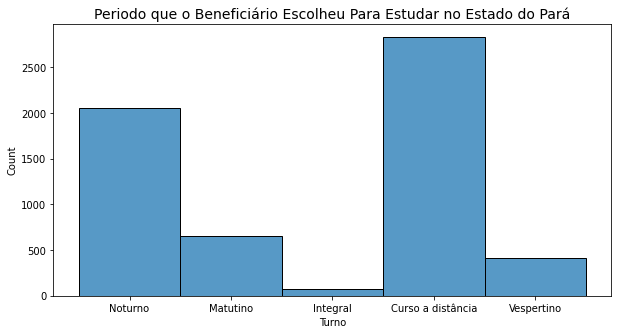

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Periodo que o Beneficiário Escolheu Para Estudar no Estado do Pará',fontsize=14)
sns.histplot(x='NOME_TURNO_CURSO_BOLSA',data=prouni_pa)
plt.xlabel('Turno');

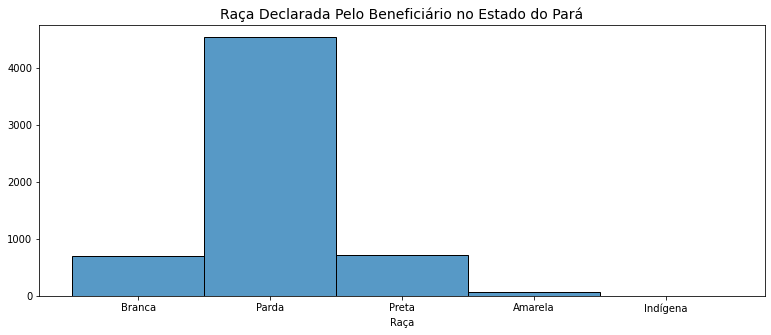

In [ ]:
plt.figure(figsize=(13,5))
plt.title('Raça Declarada Pelo Beneficiário no Estado do Pará',fontsize=14)
sns.histplot(x='RACA_BENEFICIARIO_BOLSA',data=prouni_pa)
plt.xlabel('Raça')
plt.ylabel('');

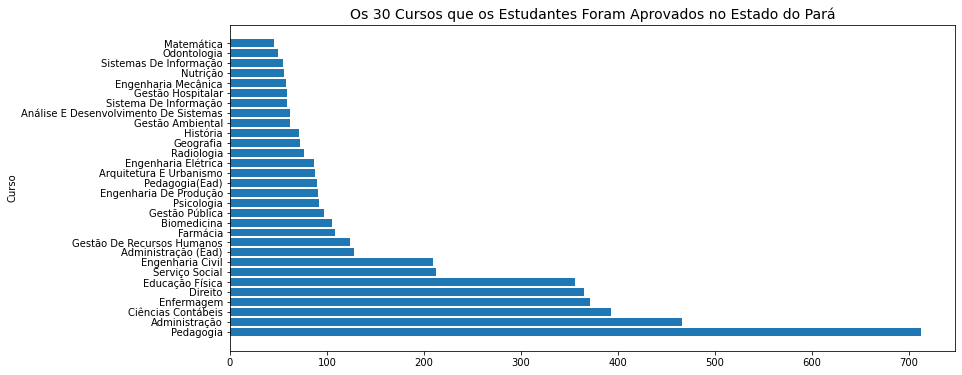

In [ ]:
plt.figure(figsize=(13,6))
plt.title('Os 30 Cursos que os Estudantes Foram Aprovados no Estado do Pará',fontsize=14)
plt.barh(prouni_pa['NOME_CURSO_BOLSA'].value_counts().index[0:30],
         prouni_pa['NOME_CURSO_BOLSA'].value_counts()[0:30])
plt.ylabel('Curso');

<BarContainer object of 30 artists>

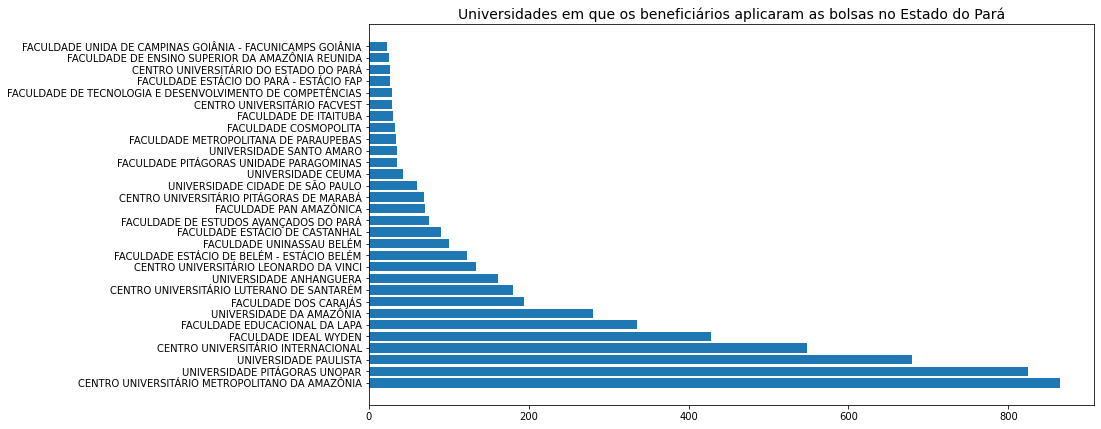

In [ ]:
plt.figure(figsize=(13,7))
plt.title('Universidades em que os beneficiários aplicaram as bolsas no Estado do Pará',fontsize=14)
plt.barh(prouni_pa['NOME_IES_BOLSA'].value_counts().index[0:30],
         prouni_pa['NOME_IES_BOLSA'].value_counts()[0:30])